In [118]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [119]:
# Specify filepaths and filenames.
loc = 'local'

if loc == 'cryocloud':
    filepath = '/home/jovyan/ML_MB_Norway_data/'
elif loc == 'local':
    filepath = 'Data/'

filename = '2023-06-27_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

data
data.columns

Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun', 'tp_jul',
       'tp_aug', 'tp_sep', 'altitude_climate'],
      dtype='object', length=301)

In [120]:
# Make year column
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

In [121]:
# Get data for Nigardsbreen
glacier_data_all = data.loc[data['RGIID']=='RGI60-08.01126']

glacier_data_all
# 950 point measurements

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,year
1930,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1322.716089,1991
1931,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1322.716089,1998
1932,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,1322.716089,2000
1933,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,1322.716089,2001
1934,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,1322.716089,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,RGI60-08.01126,G007099E61715N,2297,32,401670.0,6847020.0,1800.0,NaN,N99,N9968,...,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336,1382.210502,1970
2876,RGI60-08.01126,G007099E61715N,2297,32,400520.0,6842250.0,1555.0,NaN,NaN,NA63,...,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502,1963
2877,RGI60-08.01126,G007099E61715N,2297,32,400350.0,6842570.0,1579.0,NaN,NC,NC63,...,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502,1963
2878,RGI60-08.01126,G007099E61715N,2297,32,400260.0,6840930.0,1612.0,NaN,NF,NF62,...,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234,1382.210502,1962


In [122]:
# Select columns

base_cols = ['balance_netto','year','lat','lon','altitude','aspect','slope','slope_factor','altitude_climate']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]
cols

['balance_netto',
 'year',
 'lat',
 'lon',
 'altitude',
 'aspect',
 'slope',
 'slope_factor',
 'altitude_climate',
 't2m_oct',
 't2m_nov',
 't2m_des',
 't2m_jan',
 't2m_feb',
 't2m_mar',
 't2m_apr',
 't2m_may',
 't2m_jun',
 't2m_jul',
 't2m_aug',
 't2m_sep',
 'tp_oct',
 'tp_nov',
 'tp_des',
 'tp_jan',
 'tp_feb',
 'tp_mar',
 'tp_apr',
 'tp_may',
 'tp_jun',
 'tp_jul',
 'tp_aug',
 'tp_sep']

In [123]:
# Select columns for Nigardsbreen
glacier_data = glacier_data_all[cols]

# Reset index of new dataframe
glacier_data.reset_index(drop=True, inplace=True)

glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,1322.716089,270.932251,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,1322.716089,268.193298,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,1322.716089,273.114014,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,1322.716089,272.787598,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,1382.210502,271.784027,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
946,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
947,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
948,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [124]:
# Remove cells with nan in balance_netto.
#glacier_data['balance_netto'].notna()
glacier_data = glacier_data[glacier_data['balance_netto'].notna()]


In [125]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,1322.716089,270.932251,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,1322.716089,268.193298,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,1322.716089,273.114014,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,1322.716089,272.787598,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,1382.210502,271.784027,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
909,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
910,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
911,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


**Train and test split**

We have 913 observations over the period 1962-2021.

We do a random split in time by the index of the measurement (0-912). 

In [152]:
#np.unique(glacier_data.index.get_level_values(0).values).shape
#Gives 913 unique values

idcs = glacier_data.index.values

glacier_train, glacier_test = train_test_split(idcs, test_size=0.30, random_state=0)
                                               #train_size=0.7,
                                               #test_size=0.3)

df_train_all = glacier_data.loc[glacier_train]
df_test = glacier_data.loc[glacier_test]


In [153]:
df_train_all.reset_index(drop=True, inplace=True)
df_train_all

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,2.13,1965,61.682842,7.059657,1870.0,1.478597,0.072180,3.872423,1382.210502,270.186035,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844
1,-0.46,1977,61.702761,7.228837,1594.0,3.765552,0.073791,3.872423,1322.716089,269.588593,...,0.001914,0.002525,0.000702,0.003028,0.003114,0.001872,0.003864,0.004630,0.004887,0.006896
2,-1.89,1980,61.712388,7.209574,1589.0,6.218546,0.038189,3.872423,1322.716089,268.785400,...,0.006043,0.002322,0.002534,0.001683,0.003321,0.001813,0.004296,0.005359,0.005201,0.008775
3,1.27,1988,61.693618,7.071100,1802.0,0.943172,0.059008,3.872423,1382.210502,271.582855,...,0.006896,0.004001,0.003978,0.001794,0.005173,0.002037,0.001994,0.008487,0.005749,0.008732
4,-1.25,1985,61.678919,7.134650,1618.0,0.159165,0.088595,3.872423,1382.210502,270.824463,...,0.005679,0.002990,0.003786,0.004159,0.002829,0.001939,0.002446,0.005685,0.007217,0.007370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.42,2016,61.728126,7.099950,1674.0,1.600567,0.021091,3.872423,1382.210502,272.973572,...,0.015450,0.005262,0.004681,0.002939,0.003274,0.002463,0.003990,0.008137,0.008667,0.007338
635,0.15,1994,61.669921,7.165215,1481.0,1.515518,0.116491,3.632652,1322.716089,269.199158,...,0.005051,0.007489,0.000399,0.009600,0.005047,0.001893,0.006551,0.004973,0.004753,0.003119
636,-1.50,1969,61.716680,7.125594,1592.0,2.486672,0.151343,3.104727,1382.210502,268.541718,...,0.001538,0.005657,0.002251,0.003153,0.003520,0.001913,0.002004,0.007230,0.002486,0.009946
637,0.73,1963,61.729531,7.110654,1670.0,2.483241,0.019474,3.872423,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834


In [14]:
df_test.reset_index(drop=True, inplace=True)
df_test

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,0.98,1963,61.714394,7.106945,1596.0,1.937343,0.040638,3.872423,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
1,1.03,1963,61.708832,7.068693,1716.0,0.640149,0.056252,3.872423,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
2,1.70,1965,61.688237,7.103103,1654.0,2.327077,0.046845,3.872423,1382.210502,270.186035,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844
3,-1.22,1964,61.700374,7.128986,1510.0,2.475441,0.095225,3.872423,1382.210502,270.912506,...,0.005439,0.006454,0.005130,0.000585,0.004163,0.003896,0.008467,0.007440,0.005040,0.007061
4,0.33,2002,61.728201,7.098904,1680.0,1.600567,0.021091,3.872423,1382.210502,272.723053,...,0.003802,0.006425,0.008304,0.007301,0.001875,0.003072,0.005781,0.006115,0.003358,0.004391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.50,1971,61.703979,7.207867,1498.0,3.840757,0.073938,3.872423,1322.716089,269.713837,...,0.005583,0.006180,0.006162,0.004273,0.004249,0.004014,0.003087,0.003699,0.004485,0.005794
270,0.51,2016,61.719029,7.150469,1464.0,2.682854,0.066903,3.872423,1322.716089,273.122375,...,0.015001,0.005127,0.004438,0.002803,0.003273,0.002332,0.003857,0.007913,0.008528,0.007203
271,-3.02,2020,61.695007,7.161627,970.0,2.575566,0.159756,3.005556,1322.716089,270.543579,...,0.008732,0.014583,0.010563,0.007209,0.005500,0.003485,0.002285,0.005823,0.005338,0.008905
272,-0.14,2004,61.671733,7.159061,1507.0,2.137398,0.085120,3.872423,1322.716089,267.533600,...,0.010493,0.002339,0.006110,0.003436,0.003074,0.004875,0.005744,0.004369,0.004617,0.009052


Training set is 639 and test set is 274. 

In [154]:
# Save test and training+validation dataset
df_test.to_csv(filepath + 'train_test/data_test_nigardsbreen.csv')
df_train_all.to_csv(filepath + 'train_test/data_train_all_nigardsbreen.csv')

**Train and validation split**

Training dataset is 639 measurements in total. 

Split in 80% training and 20% validation.

In [155]:
idcs = df_train_all.index.values

train_dataset, validation_dataset = train_test_split(idcs, 
                                                   train_size=0.8,
                                                   test_size=0.2,
                                                    random_state = 0)

df_train = glacier_data.loc[train_dataset]
df_validation = glacier_data.loc[validation_dataset]
df_train.shape, df_validation.shape

((511, 33), (128, 33))

Training set is 511 and test set is 128.

In [156]:
df_validation.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [157]:
# Save training and validation dataset
#filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train.to_csv(filepath + 'train_test/data_train_nigardsbreen.csv')
df_validation.to_csv(filepath + 'train_test/data_validation_nigardsbreen.csv')


## Model training with k-fold cross-validation for Nigardsbreen 
### Run from here to load training and test sets and train models

Model training with k-fold cross-validation for the whole Nigardsbreen dataset.
Using random split for training and testing and grid search with k-fold cross validation (without shuffling) for model hyperparameter selection. 
ElasticNet model and XGBoost.

In [159]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [160]:
# Load training and validation datasets
#filepath = '/home/jovyan/ML_MB_Norway_data/'
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_nigardsbreen.csv', index_col=0)
#df_validation_orig = pd.read_csv(filepath + 'train_test/data_validation_nigardsbreen.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_nigardsbreen.csv', index_col=0)

#df_train = pd.concat([df_train_orig, df_validation_orig])

In [161]:
df_train.shape, df_test.shape

((639, 33), (274, 33))

In [162]:
features_to_drop = ['balance_netto', 'year', 'lat', 'lon']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['balance_netto']]

X_train, y_train = df_train_X.values, df_train_y.values

df_test_X = df_test.drop(features_to_drop, axis=1)
df_test_y = df_test[['balance_netto']]

X_test, y_test = df_test_X.values, df_test_y.values

In [163]:
X_test.shape, X_train.shape

((274, 29), (639, 29))

In [186]:
def plot_prediction(y1, y2, data_type:str, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation " + data_type, fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -15
    lineEnd = 8
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$MSE=%.2f$' % (mean_squared_error(y_expected, y_predicted, squared=True), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### ElasticNet

Using cross-validation with 5 folds, K-fold split.

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [167]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [168]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
# Create Kfold iterator for given number of splits
num_splits = 5
kf = KFold(n_splits=num_splits) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
kf

# Grid search for best hyperparameters
elastic= ElasticNetCV(l1_ratio = np.arange(0.01,1,0.05),
                      #l1_ratio = [0.001,0.005,0.01,0.03,0.07,0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9,0.95, 1],
                      #alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,6],
                      alphas = np.arange(0.001,2,0.001),
                      max_iter = 50000, 
                      cv = kf,
                      tol=0.001)

elastic.fit(X_train_scaled,y_train) # Fit is on grid of alphas and best alpha estimated by cross-validation.

C:\Program Files\Anaconda3\envs\ML_MB_Norway_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
             cv=KFold(n_splits=5, random_state=None, shuffle=False),
             l1_ratio=array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
             max_iter=50000, tol=0.001)

In [258]:
elastic.l1_ratio_, elastic.alpha_

(0.91, 0.007)

In [261]:
# Define model object with best hyperparameters.
elastic_model = ElasticNet(alpha = elastic.alpha_, 
                           l1_ratio = elastic.l1_ratio_)

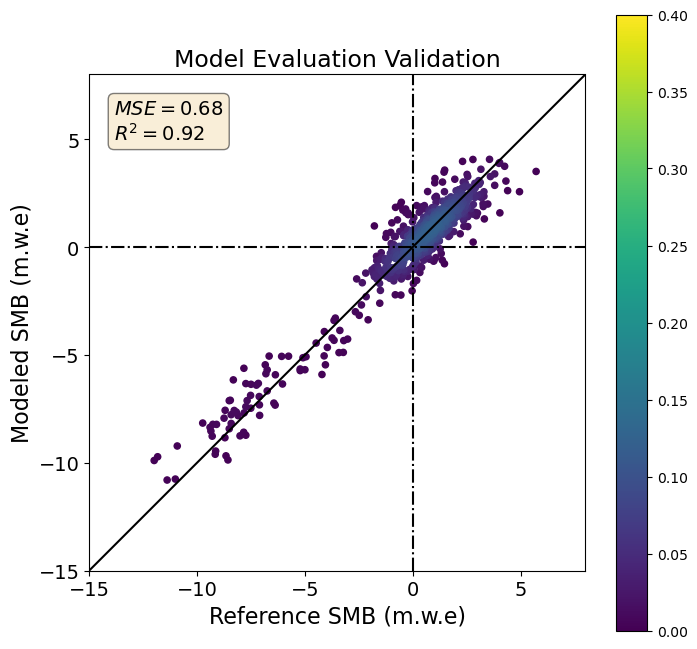

In [263]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    elastic_model.fit(X_train1, y_train1)
    y_pred = elastic_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

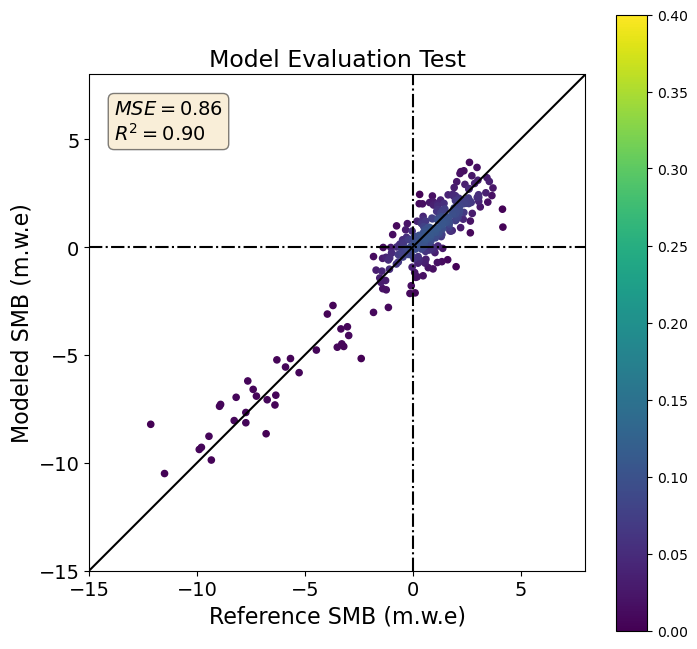

In [264]:
#plot_prediction(y_test, elastic.predict(X_test_scaled), 'Test', n_toplot=5000)

# Predict on hold-out test set and plot predictions
elastic_model.fit(X_train_scaled, y_train)
y_pred_test = elastic_model.predict(X_test_scaled)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### XGBoost model

Using cross-validation with 5 folds (80/20 split).


In [172]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [250]:
# Create Kfold iterator for given number of splits
num_splits = 5
kf = KFold(n_splits=num_splits) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
kf
#idcs = kf.split(X_train, y_train)

# Iterator using ShuffleSplit
#test_size = 0.2
#train_size = 0.8
#ss = ShuffleSplit(n_splits=10, test_size=test_size, train_size=train_size, random_state=5)
#ss.split(X_train, y_train)
#for train_index, test_index in ss.split(X_train, y_train):
#    print("%s" % (train_index))
#    print("%s" % (test_index))
#np.sum(np.isnan(y_test1))

KFold(n_splits=5, random_state=None, shuffle=False)

In [175]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [10, 20, 30, 40, 50],#, 100, 150, 200],#, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=kf, # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=True) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

results.keys()

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
-0.4119227169823274
{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 50}


In [177]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

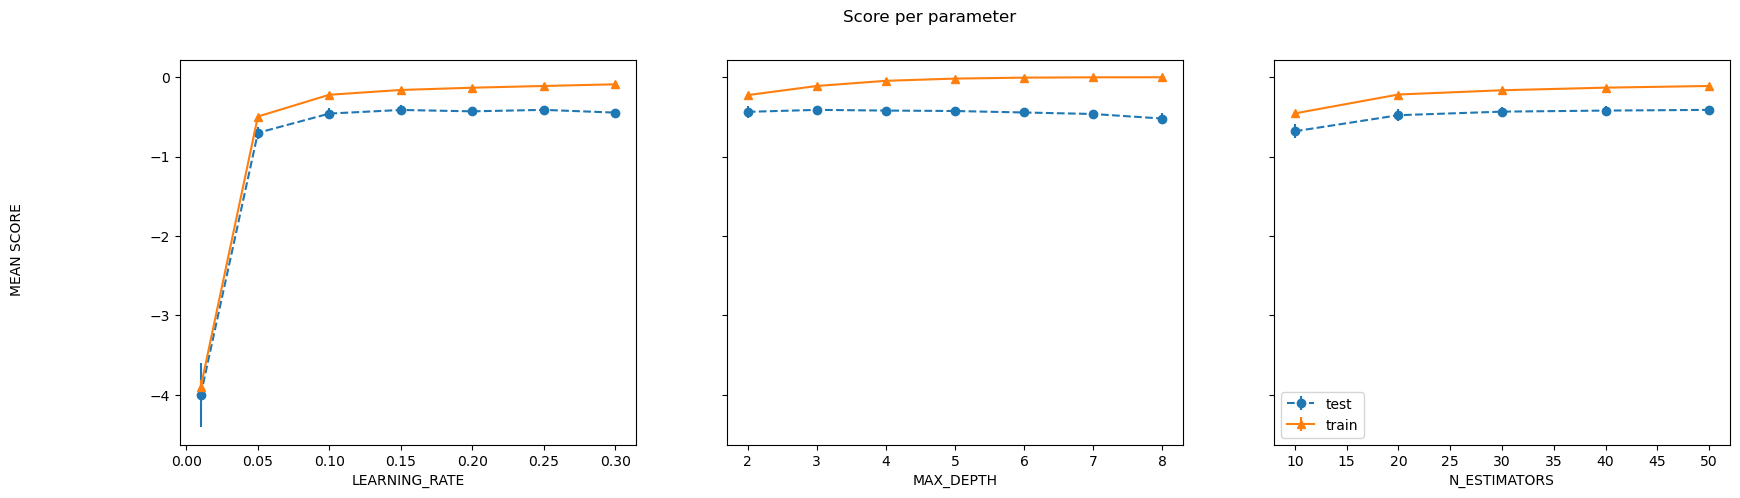

In [178]:
plot_search_results(clf)

In [75]:
#df_results_cv = pd.DataFrame.from_dict(results)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("n_estimators")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("n_estimators")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_n_estimators', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .5)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_n_estimators', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .5)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate n_estimators")

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("learning_rate")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("learning_rate")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_learning_rate', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .2)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_learning_rate', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .2)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate learning_rate")

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("max_depth")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("max_depth")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_max_depth', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .7)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_max_depth', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .7)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate max_depth")

In [251]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])



In [252]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-0.39454863 -0.50123587 -0.3867063  -0.43822876 -0.33889403]
Mean score:  -0.4119227169823274
Standard deviation:  0.05466216943537108


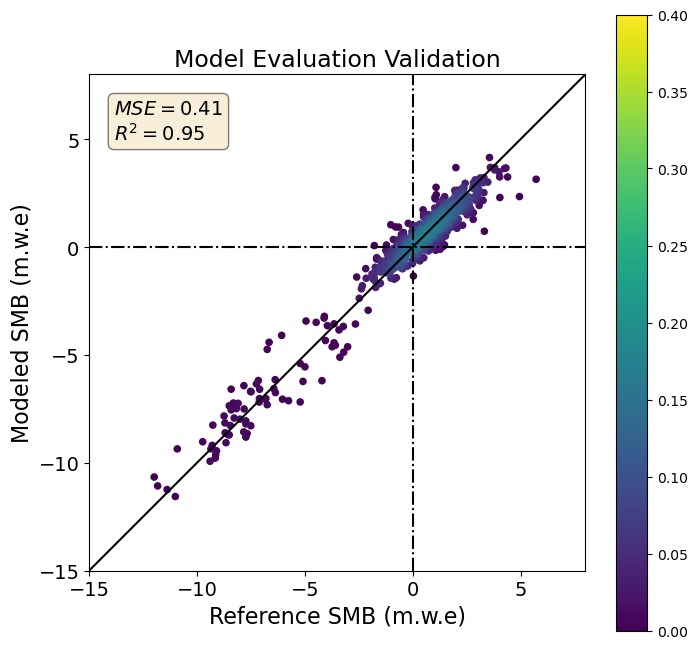

In [245]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

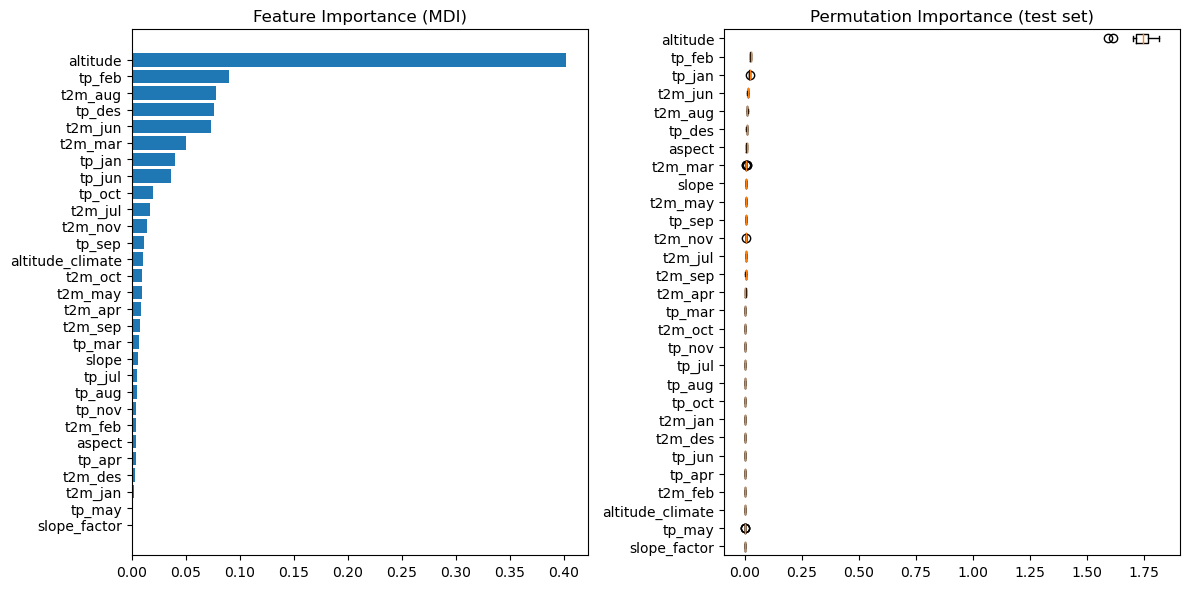

In [253]:
from sklearn.inspection import permutation_importance

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

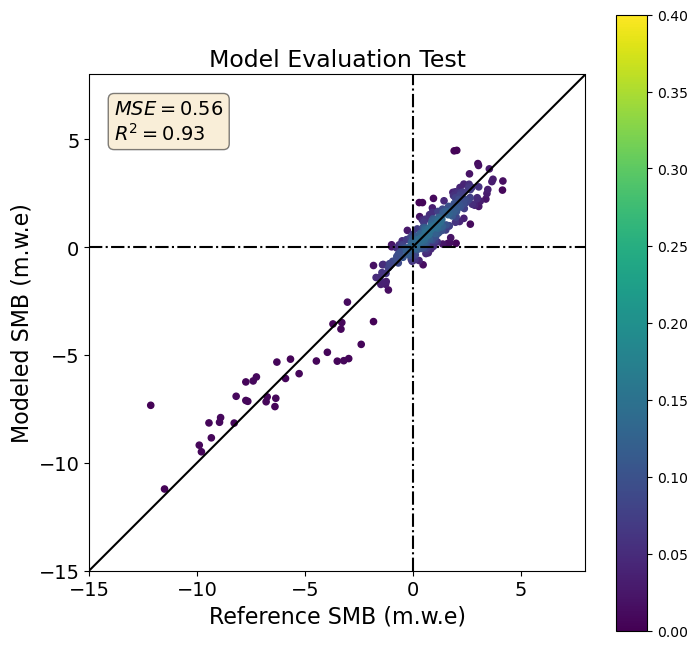

In [254]:
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### Summary

k-fold validation score ElasticNet: <br>
MSE=0.68, R2=0.92 <br>
test score ElasticNet: <br>
MSE=0.86, R2=0.90

k-fold validation score XGBoost: <br>
MSE=0.41, R2=0.95 <br>
test score XGBoost: <br>
MSE=0.56, R2=0.93